In [1]:
import pandas as pd
import requests, json
import numpy as np
from bs4 import BeautifulSoup

# Extracting all the `women` athletes from 2013-2021

In [2]:
female_ranks = []
female_names = []
female_country = []
gender_F = []
age_F = []
years_F = []
for year in range(13,22):
    url_f = f'https://c3po.crossfit.com/api/competitions/v2/competitions/games/20{year}/leaderboards?division=2&sort=0'

    data = requests.get(url_f)

    json_data = json.loads(data.text)
    leaderboardRows = json_data['leaderboardRows']

    for row in leaderboardRows:
        rank = row['overallRank']
        name = row['entrant']['competitorName']
        gender = row['entrant']['gender']
        age = row['entrant']['age']

        
        
        female_ranks.append(rank)
        female_names.append(name)
        gender_F.append(gender)
        age_F.append(age)
        years_F.append(f'20{year}')
        





# Extracting all the `men` athletes from 2013-2021

In [3]:
men_names = []
men_ranks = []
men_age = []
gender_M = []
years_M = []


for year in range(13,22):

    url = f'https://c3po.crossfit.com/api/competitions/v2/competitions/games/20{year}/leaderboards?division=1&sort=0'
    data = requests.get(url)

    json_data = json.loads(data.text)
    leaderboardRows = json_data['leaderboardRows']

    for row in leaderboardRows:
        rank = row['overallRank']
        name = row['entrant']['competitorName']
        gender = row['entrant']['gender']
        age = row['entrant']['age']


        men_ranks.append(rank)
        men_names.append(name)
        gender_M.append(gender)
        men_age.append(age)
        
        years_M.append(f'20{year}')




## Combining the lists

In [4]:
all_names = men_names + female_names 
all_ranks = men_ranks + female_ranks
all_genders = gender_M + gender_F
all_years = years_M + years_F
all_age = age_F + men_age


# Displaying and manipulating data

In [5]:
pd.options.display.max_rows = 1000

In [6]:
# DataFrame for all female athletes

Female_CF_df = pd.DataFrame(list(zip(female_names, female_ranks, age_F, years_F)),
               columns =['Names', 'Rank', 'Age', 'Year'])

Female_CF_df

,Names,Rank,Age,Year
0,Samantha Briggs,1,31,2013
1,Lindsey Valenzuela,2,26,2013
2,Valerie Voboril,3,34,2013
3,Alessandra Pichelli,4,27,2013
4,Talayna Fortunato,5,32,2013
5,Jenn Jones,6,28,2013
6,Christy Phillips,7,27,2013
7,Michelle Kinney,8,29,2013
8,Anna Tunnicliffe,9,30,2013
9,Elisabeth Akinwale,10,34,2013


In [7]:
# DataFrame for all male athletes

Male_CF_df = pd.DataFrame(list(zip(men_names, men_ranks, men_age, years_M)),
               columns =['Names', 'Rank', 'Age', 'Year'])

Male_CF_df

,Names,Rank,Age,Year
0,Rich Froning,1,25,2013
1,Jason Khalipa,2,27,2013
2,Ben Smith,3,23,2013
3,Scott Panchik,4,25,2013
4,Garret Fisher,5,22,2013
5,Marcus Hendren,6,24,2013
6,Josh Bridges,7,29,2013
7,Dan Bailey,8,29,2013
8,Neal Maddox,9,35,2013
9,ZA Anderson,10,24,2013


### Replacing all '--' strings and 'DQ' (DisQualified) to '0' and making all '0' to NaN


In [8]:
# replacing the strings and making their Dtype to integers

Female_CF_df['Rank'] = Female_CF_df['Rank'].replace('--', '0').replace('DQ', '0').astype(int)

Male_CF_df['Rank'] = Male_CF_df['Rank'].replace('--', '0').replace('DQ', '0').astype(int)


In [9]:
# change columns Dtype from object to int

Female_CF_df[['Age', 'Year']] = Female_CF_df[['Age', 'Year']].astype(int)


Male_CF_df[['Age', 'Year']] = Female_CF_df[['Age', 'Year']].astype(int)



In [10]:
#  Make rank 0 and DQ (DisQualified) athletes to NaN

Female_CF_df['Rank'] = Female_CF_df['Rank'].replace(0, np.nan)
Male_CF_df['Rank'] = Male_CF_df['Rank'].replace(0, np.nan)




## Displaying the DataFrames by year

In [11]:
#Male_CF_df.set_index(["Year", "Rank"])

In [12]:
#Female_CF_df.set_index(["Year", "Rank"])


## plot `female` and `male` athletes with 2 or more medals from all the years 


<AxesSubplot:xlabel='Names'>

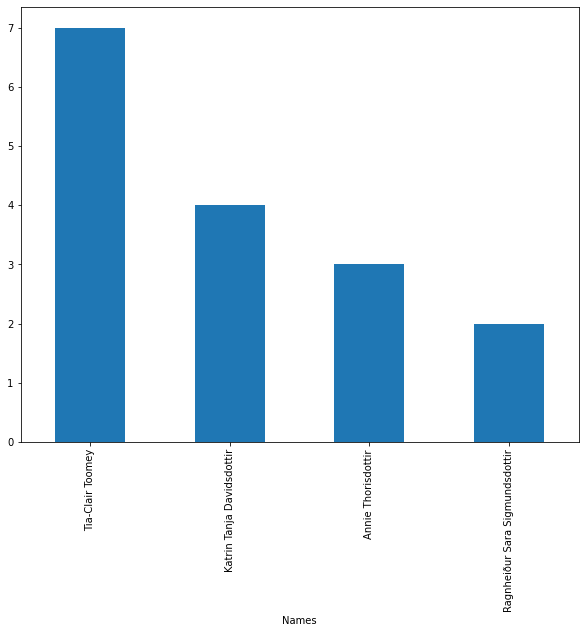

In [17]:
Female_CF_df.loc[Female_CF_df.Rank.isin([1,2,3])].groupby("Names")["Rank"].count().sort_values(
    ascending=False).head(4).plot(kind="bar",figsize=(10,8))

<AxesSubplot:xlabel='Names'>

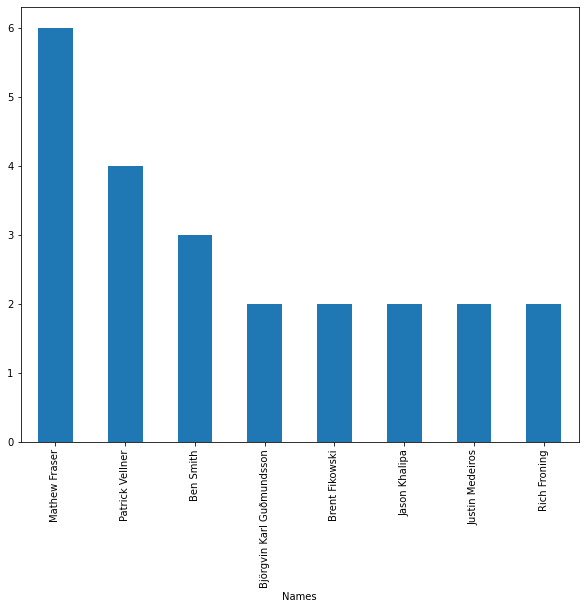

In [16]:
Male_CF_df.loc[Male_CF_df.Rank.isin([1,2,3])].groupby("Names")["Rank"].count().sort_values(
    ascending=False).head(8).plot(kind="bar",figsize=(10,8))

## plot most participating athletes for `women` (6 times or more)



<AxesSubplot:xlabel='Names'>

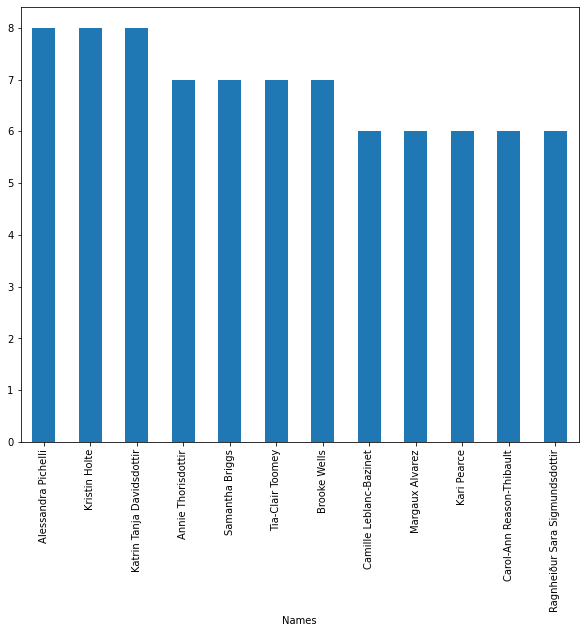

In [19]:
Female_CF_df.groupby('Names')['Year'].count().sort_values(ascending=False).head(12).plot(kind='bar',figsize=(10,8))

## plot most participating athletes for `men` (6 times or more)


<AxesSubplot:xlabel='Names'>

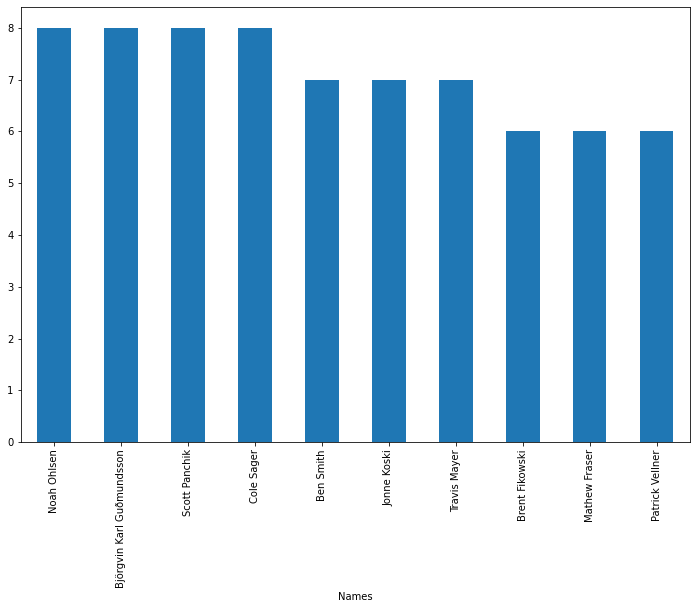

In [21]:
Male_CF_df.groupby('Names')['Year'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,8))

# Plotting 5 favorite athletes

Checks how every athlete have perfomed during OPEN, REGIONALS and GAMES the last years.

Source for OPEN, REGIONALS & GAMES. [link](https://en.wikipedia.org/wiki/CrossFit_Games)




In [22]:
url = 'https://games.crossfit.com/athlete/153604'
import lxml.html as lh

In [23]:
response = requests.get(url)
html = response.content
soup = BeautifulSoup(html)


In [24]:
doc = lh.fromstring(response.content)

In [25]:
tr_elements = doc.xpath('//tr')

In [26]:
[i.text for i in soup.select('div > :nth-child(3) .c-heading-data-sub')]

[' Regionals ']

In [27]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Year"
2:"Division"
3:"Rank Worldwide"
4:"Rank by Region"
5:"Rank By Country"


In [28]:
[len(T) for T in tr_elements]


[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [29]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 5, the //tr data is not from our table 
    if len(T)!=5:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [30]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [31]:
df.head()

,Year,Division,Rank Worldwide,Rank by Region,Rank By Country
0,2020,Men,2nd,\n --\n,\n 1st United States\n ...
1,2019,Men,1st,\n --\n,\n 1st United States\n ...
2,2018,Men,1st,\n 1st Central East\n ...,\n --\n
3,2017,Men,1st,\n 1st North East\n ...,\n 1st United States\n
4,2016,Individual Men,7th,\n 1st \n,\n 6th United States\n
